<a href="https://colab.research.google.com/github/SWARNADEEP001/DERMASCAN/blob/main/DFL_AN_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def gaussian_membership(x, mu, sigma):
    return np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def calculate_firing_strengths(p, sigma=0.2):
    mu_low = np.min(p)
    mu_high = np.max(p)
    mu_med = (mu_low + mu_high) / 2

    f_low = gaussian_membership(p, mu_low, sigma)
    f_med = gaussian_membership(p, mu_med, sigma)
    f_high = gaussian_membership(p, mu_high, sigma)

    return f_low, f_med, f_high

def get_diagonal_sum(matrix):
    return np.trace(matrix)

def get_antidiagonal_sum(matrix):
    return np.trace(np.fliplr(matrix))

def get_horizontal_sum(matrix):
    return np.sum(np.max(matrix, axis=0))

def get_vertical_sum(matrix):
    return np.sum(np.max(matrix, axis=1))


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/CSF_Gaussian_DL/cognitive_normal_dataset.xlsx')

affected_samples_p1 = df.loc[1:88, 'P1'].values
affected_samples_p2 = df.loc[1:88, 'P2'].values
normal_samples_p1 = df.loc[89:199, 'P1'].values
normal_samples_p2 = df.loc[89:199, 'P2'].values

CN = np.zeros((3, 3))
CA = np.zeros((3, 3))


In [ ]:
for p1, p2 in zip(normal_samples_p1, normal_samples_p2):
    f1_low, f1_med, f1_high = calculate_firing_strengths(p1)
    f2_low, f2_med, f2_high = calculate_firing_strengths(p2)

    A = np.array([[min(f1_high, f2_low), min(f1_high, f2_med), min(f1_high, f2_high)],
                  [min(f1_med, f2_low), min(f1_med, f2_med), min(f1_med, f2_high)],
                  [min(f1_low, f2_low), min(f1_low, f2_med), min(f1_low, f2_high)]])

    max_index = np.unravel_index(np.argmax(A), A.shape)
    CN[max_index] += 1

for p1, p2 in zip(affected_samples_p1, affected_samples_p2):
    f1_low, f1_med, f1_high = calculate_firing_strengths(p1)
    f2_low, f2_med, f2_high = calculate_firing_strengths(p2)

    A = np.array([[min(f1_high, f2_low), min(f1_high, f2_med), min(f1_high, f2_high)],
                  [min(f1_med, f2_low), min(f1_med, f2_med), min(f1_med, f2_high)],
                  [min(f1_low, f2_low), min(f1_low, f2_med), min(f1_low, f2_high)]])

    max_index = np.unravel_index(np.argmax(A), A.shape)
    CA[max_index] += 1


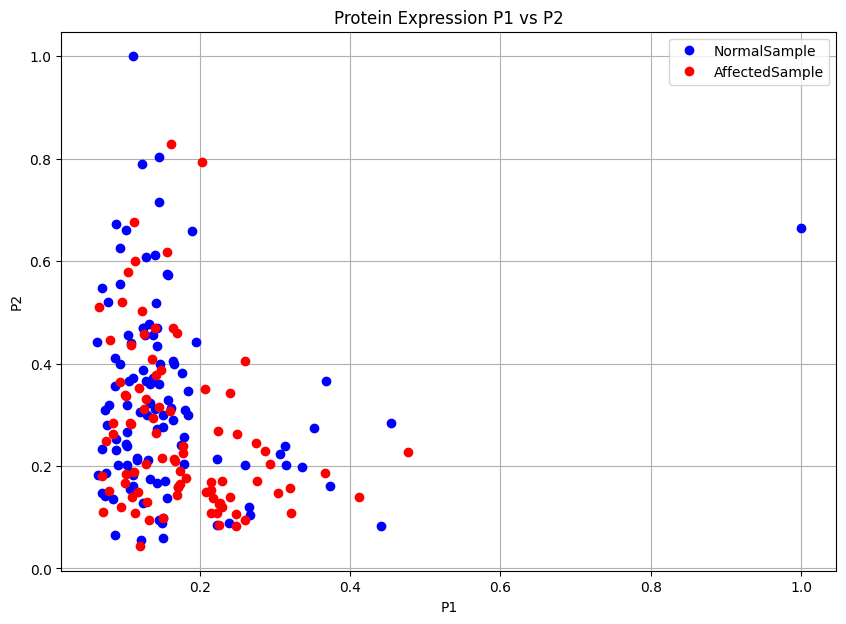

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(normal_samples_p1, normal_samples_p2, 'bo', label='NormalSample')
plt.plot(affected_samples_p1, affected_samples_p2, 'ro', label='AffectedSample')
plt.grid(True)
plt.legend()
plt.title('Protein Expression P1 vs P2')
plt.xlabel('P1')
plt.ylabel('P2')
plt.show()


In [ ]:
Cij = np.maximum(CN, CA)

print("\nCN Matrix:")
print(CN)
print("\nCA Matrix:")
print(CA)
print("\nCij Matrix:")
print(Cij)

NormalSample = len(normal_samples_p1)
AffectedSample = len(affected_samples_p2)

TotalNormal = np.sum(CN)
TotalAffected = np.sum(CA)

# Compute MaxDiag
diagonal_sum = get_diagonal_sum(Cij)
antidiagonal_sum = get_antidiagonal_sum(Cij)
horizontal_sum = get_horizontal_sum(Cij)
vertical_sum = get_vertical_sum(Cij)
MaxDiag = max(diagonal_sum, antidiagonal_sum, horizontal_sum, vertical_sum)

# Compute offDiag
total_sum_C = np.sum(Cij)
offDiag = total_sum_C - MaxDiag

# Compute offDiagNormal and offDiagAffected
offDiagNormal = TotalNormal - (MaxDiag - offDiag)
offDiagAffected = TotalAffected - (MaxDiag - offDiag)

# Compute DfL
DfL = max(offDiagNormal * 100 / NormalSample, offDiagAffected * 100 / AffectedSample)

# Compute AN and AA
AN = TotalNormal * 100 / NormalSample
AA = TotalAffected * 100 / AffectedSample

print(f"\nMaxDiag: {MaxDiag}")
print(f"DfL: {DfL:.2f}%")
print(f"AN: {AN:.2f}%")
print(f"AA: {AA:.2f}%")



CN Matrix:
[[109.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]

CA Matrix:
[[88.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]

Cij Matrix:
[[109.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.   0.]]

MaxDiag: 109.0
DfL: 0.00%
AN: 100.00%
AA: 100.00%
